# **Сбор данных и анализ групп пользователей социальной сети ВКонтакте**

In [ ]:
!pip install requests

In [ ]:
import requests 
import time
import re
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime

**1. Выберите 2 тематических сообщества**

In [ ]:
access_token = "0906a3e80906a3e80906a3e8630a15a86c009060906a3e86d098518b9ef19be9b4e879a"
khl_n = "16202769" # Континентальная хоккейная лига
rpl_n = "51812607" # Мир Российская Премьер-Лига

**2. Сохраните списки участников выбранных сообществ. Есть ли пользователи, относящиеся к обоим сообществам?**

In [ ]:
def get_group_members(group_id, access_token):
    members = []
    offset = 0
    count = 1000
    while True:
        params = {
            "group_id": group_id,
            "access_token": access_token,
            "v": "5.131",
            "offset": offset,
            "count": count,
        }
        response = requests.get("https://api.vk.com/method/groups.getMembers", params=params)
        if response.status_code == 200:
            data = response.json()
            members.extend(data["response"]["items"])
            offset += count
            if offset >= data["response"]["count"]:
                break
            time.sleep(0.1)
        else:
            print(f"Ошибка {response.status_code}: {response.text}")
            break
    return members


In [ ]:
khl_members = get_group_members(khl_n, access_token)
rpl_members = get_group_members(rpl_n, access_token)

In [ ]:
common_members = set(rpl_members) & set(khl_members)

print(f"Количество пользователей, подписанных на оба сообщества: {len(common_members)}")

Количество пользователей, подписанных на оба сообщества: 262046


**3.Сохраните последние 2000 постов каждого из сообществ. Cоставьте топ хэштегов по встречаемости для каждой группы, визуализируйте полученные результаты. Сравните списки на предмет пересечений.**

In [ ]:
def get_group_posts(group_id, access_token, count=100, offset=0):
    posts = []
    while offset < 2000:
        params = {
            "owner_id": f"-{group_id}",
            "access_token": access_token,
            "v": "5.131",
            "count": count,
            "offset": offset,
        }
        response = requests.get("https://api.vk.com/method/wall.get", params=params)
        if response.status_code == 200:
            data = response.json()
            posts.extend(data["response"]["items"])
            offset += count
        else:
            print(f"Ошибка {response.status_code}: {response.text}")
            break
    return posts


In [ ]:
def get_hashtags(posts):
    hashtags = []
    for post in posts:
        text = post.get("text", "")
        tags = re.findall(r"#\w+", text)
        hashtags.extend(tags)
    return hashtags


In [ ]:
khl_posts = get_group_posts(khl_n, access_token)
rpl_posts = get_group_posts(rpl_n, access_token)

khl_hashtags = get_hashtags(khl_posts)
rpl_hashtags = get_hashtags(rpl_posts)

In [ ]:
def top_10_hashtags(community_hastags):

    hashtags_count = Counter(community_hastags)
    top_hashtags = hashtags_count.most_common(10)

    hashtags_names = [tag for tag, count in top_hashtags]
    hashtags_values = [count for tag, count in top_hashtags]

    plt.figure(figsize=(20, 10))
    plt.bar(hashtags_names, hashtags_values)
    plt.xticks(rotation=60)
    plt.xlabel('Хэштег')
    plt.ylabel('Количество')
    plt.title('Топ-10 хэштегов для сообщества РПЛ')
    plt.show()

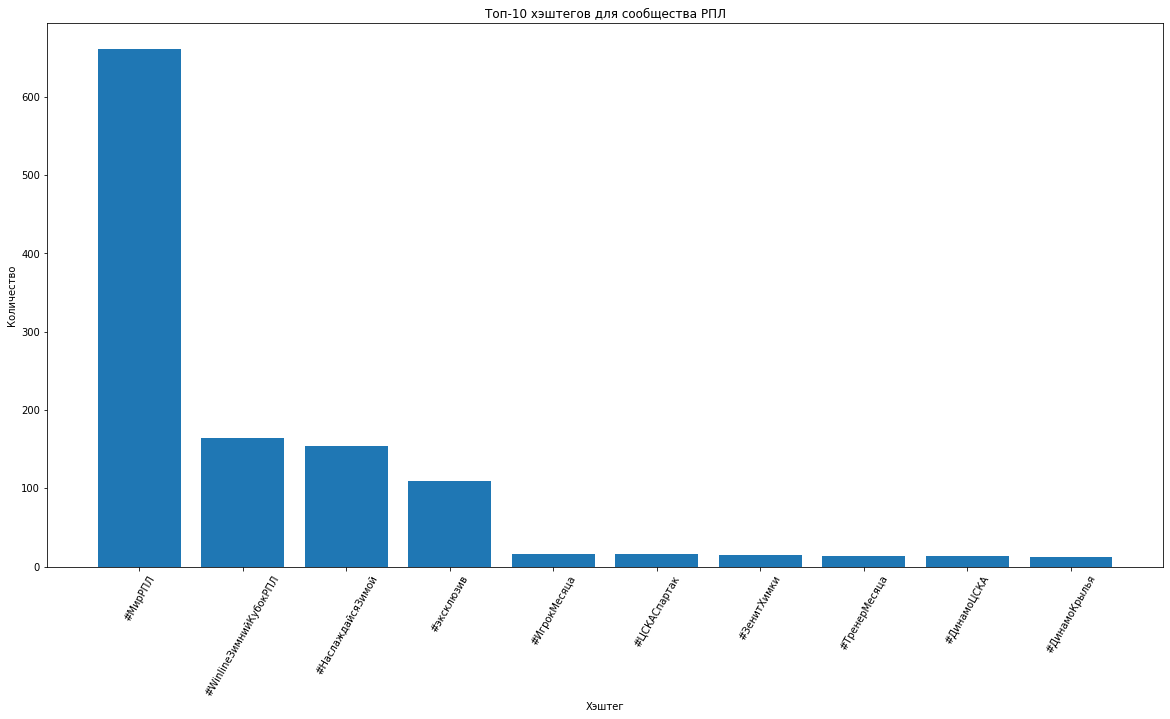

In [ ]:
top_10_hashtags(rpl_hashtags)

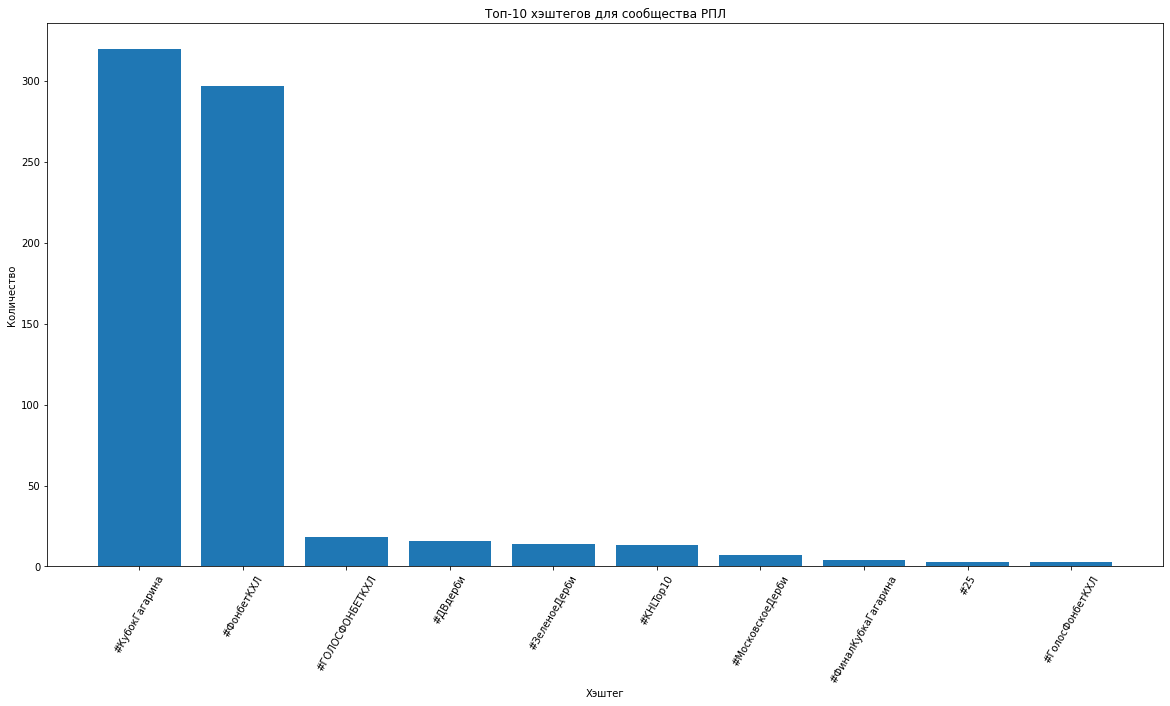

In [ ]:
top_10_hashtags(khl_hashtags)

In [ ]:
khl_unique_hashtags = set(khl_hashtags)
rpl_unique_hashtags = set(rpl_hashtags)

intersection = khl_unique_hashtags & rpl_unique_hashtags

if intersection:
    print("Пересечение найдено:")
    print(intersection)
else:
    print("Увы, пересечений нет :(")

Увы, пересечений нет.


**4.Посчитайте количество постов за каждый час суток для обоих сообществ, визуализируйте результаты. В какое время суток наиболее активны участники социальных групп? Совпадают ли часы с наибольшей активностью для обоих сообществ?**

In [ ]:
import datetime

def get_hour_from_timestamp(timestamp):
    return datetime.datetime.fromtimestamp(timestamp).hour

In [ ]:
import matplotlib.pyplot as plt

def plot_posts_by_hour(group_id, access_token):
    posts = get_group_posts(group_id, access_token)

    hours = [get_hour_from_timestamp(post["date"]) for post in posts]

    post_count = [hours.count(hour) for hour in range(24)]

    plt.figure(figsize=(20, 10))
    plt.bar(range(24), post_count)
    plt.xticks(range(24), [str(hour) for hour in range(24)], rotation=90)
    plt.xlabel("Часы")
    plt.ylabel("Кол-во постов")
    plt.title(f"Публикация постов по часам")

    plt.show()


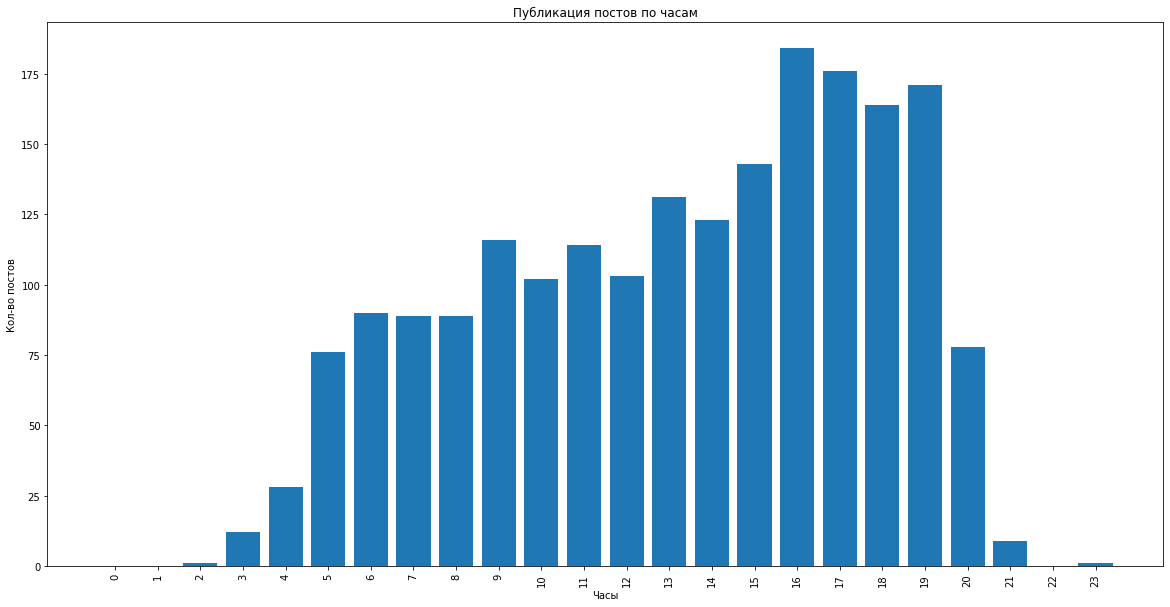

In [ ]:
plot_posts_by_hour(khl_n, access_token)

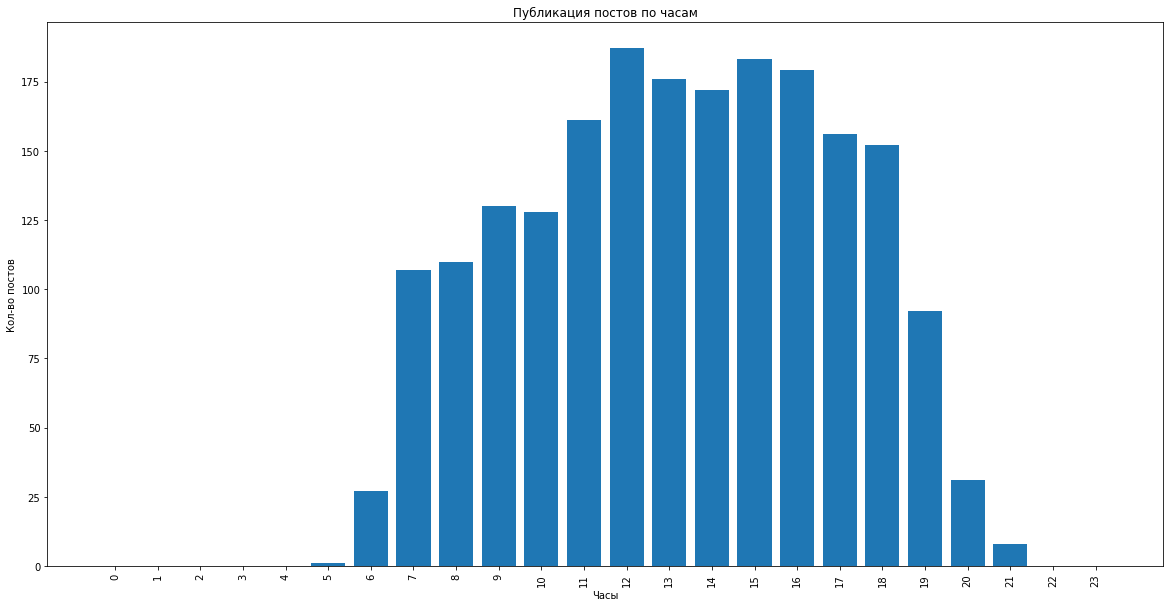

In [ ]:
plot_posts_by_hour(rpl_n, access_token)

Действительно, у обоих сообществ, посвященных спорту, наибольшее количество постов публикуется в период с 16:00 до 18:00 по московскому времени. Это может быть связано с тем, что большинство матчей хоккея и футбола проводятся в это же время, и в это время наиболее интересно общаться о происходящем на игровых площадках.